<a href="https://colab.research.google.com/github/abhish3k4/Deep-learning-Project/blob/main/02_Python_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


what we are covering =

{1: "Data Prepare and load"
                        2: "Build model"
                        3: "Fitting the model to data (data trainning)"
                        4: "Making predictions and evaluating a model (Inference)"
                        5: "Saving and loading a model"
                        6: "Putting it all together"}


In [37]:
import torch
from torch import nn # nn contains all of PyTorch's Building Block For neural Networks
import matplotlib as mpl
import matplotlib.pyplot as plt
#check Pytorch Version
torch.__version__

'2.8.0+cu126'

## 1. Data(Preparing and loading)

Data can be almost anything... in machine learning.

* Excel Spreadsheet
* Images of any kind
* Videos (YouTube has lots of data)
* Audio Like songs or podcasts
* DNA
* Text

Machine larining is a game of two parts

1. Get data into a numerical representation.
2.Build a model to learn patterns in that numerical representation


To showcase this lets create some known data using the linear regressions Formula.

We'll use a linear regression formula to make a straight line with known parameters.

In [38]:
# Create known parameters
weight = 0.7
bias = 0.3

# Creat
strat = 0
end = 1
step = 0.02
x = torch.arange(strat, end, step).unsqueeze(dim=1)
y = weight * x + bias

x[:10] , y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [39]:
len(x) , len(y)

(50, 50)

### Splitting data into trainnin and test sets one of the most importsant concepts in machine learning in general

Lets create a training and test set with our data



In [40]:
# Create a train/test split
train_split = int(0.8 * len(x))
x_train , y_train = x[:train_split] , y[:train_split]
x_test , y_test = x[train_split:] , y[train_split:]

len(x_train) , len(y_train) , len(x_test) , len(y_test)

(40, 40, 10, 10)

How might we better visualize our data
This is where the data explorer motto comes in
Visualize visulize visualize

In [41]:
def plot_predictions(train_data = x_train,
                      train_labels = y_train,
                      test_data = x_test,
                      test_labels = y_test,
                      predictions = None):

    plt.figure(figsize=(10,7))

    #Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

    #Plot testing data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data")

    #Plot predictions in red (if there are any)
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    #Show the legend
    plt.legend(prop={"size": 12})

    #Show the plot
    plt.show()

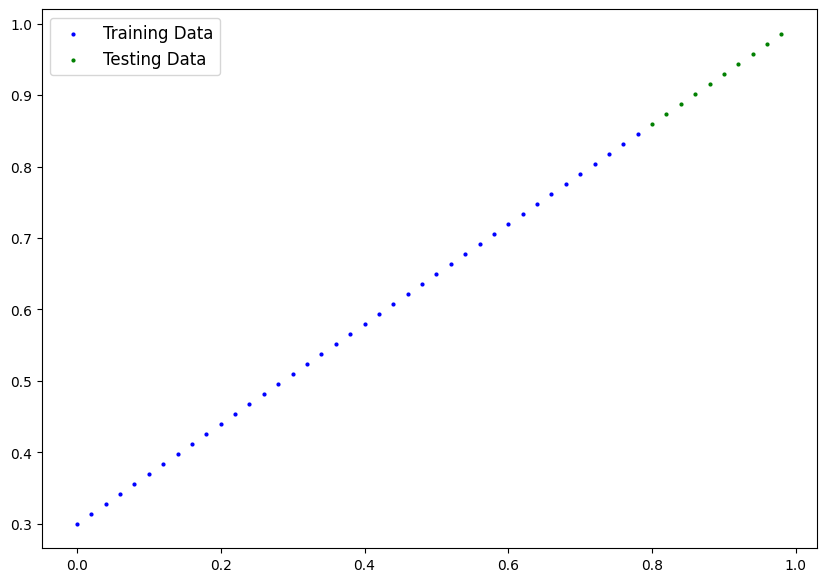

In [42]:
plot_predictions();


## 2. Build model

our first pytorch model

This one is the first pytorch model


what our model does:
Strat with random values weight & Bias
Look at training data and adjust the random values to better represent or get closer to the ideal values the weight and bias values we used to create the data

How does it do so ?

1.Graidient desent

2.Backpropogation

In [43]:
# Create linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in Python is inherit from nn.Module
 def __init__(self):
   super().__init__()
   self.weights = nn.Parameter(torch.randn(1,# <- Strat with a random weight and try to adjust it to the ideal weight
                                            requires_grad=True, # <- Can this parameter be updated via gradient descent?
                                            dtype=torch.float)) #<- PyTorch loves the datatype torch.float32
   self.bias = nn.Parameter(torch.randn(1, # <- Start with a random bias and try to adjust it to the ideal bias
                                        requires_grad=True, # <- Can this parameter be updated via gradient descent?
                                        dtype=torch.float)) # <- PyTorch loves the datatype torch.float32

 #Forward method to deifen the computation in the model
 def forward(self, x: torch.Tensor) -> torch.Tensor: # "x" is the input data
   return self.weights * x + self.bias # This is the linear Reression formula



## PyTorch model building essentials

* Torch.nn -- Contains all of the building for computational graph(A neural network can be consider as an  computational graph)
* Torch.nn.parameter - What parameter should our model try and learn , often a PyTorch layer from torch.nn will set these for us
* Torch.nn.Module - The base class for all neural network modules if you subclass it you should overwrite forward()
* torch.optim - This where the optimizer in PyTorch Live , They will help with gradient descent

* Def forward() - All nn.Module subclasses require you to overwrite forward() , this method defines what happens in the forward computation

In [44]:
 # Create a random seed
 torch.manual_seed(42)

 # Create an isntance of the model this a subclass of nn.module
 model_O = LinearRegressionModel()

 # Check out the parameters
 list (model_O.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [45]:
# List named parameters
model_O.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [46]:
weight , bias

(0.7, 0.3)

### Making prediction using 'Torch.inference_model()'

To check our model's predictive power let's see how well it predicts y_test based on x_test

When we pass data thorugh our model, it's going to run it through the 'forward()'  method.

In [47]:
x_test  , y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [48]:
y_preds = model_O(x_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [49]:
## Make prediction with model
with torch.inference_mode():
  y_preds = model_O(x_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [50]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

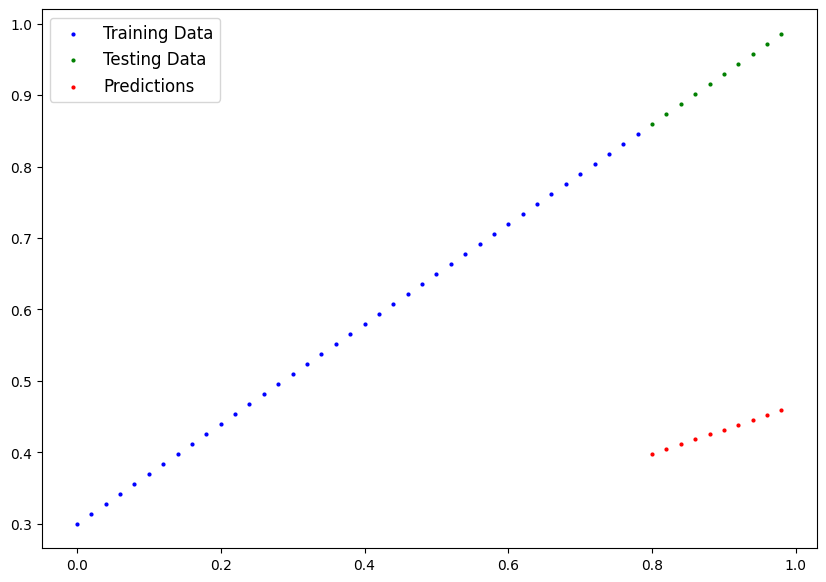

In [51]:
plot_predictions(predictions = y_preds)

## 3. Train model

The whole idea of training is for a model  to move from some *unknown* These may be random to some known parameters

Or in other words form a represenataition fo the data to a better representation of the data

One way to measure how poor or how wrong you model predictions are is to true


**Note : Loss function may also be called cost function or criterion in different areas for our case were foing to refer to it as a loss function

Things we need to train:

**Loss funciton : A function to measure how woring your model prediction are to the ideal lower is better.
**optimizer : Takes inot account the loss of a model and adjust  the model paraments eg weight and bias in our case to improve the loss function.

And specifically for PyTorch, we need:
A training loop
A testing loop


In [52]:
list(model_O.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [53]:
model_O.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

## Setup a loss function

In [54]:
# Setup a loss function
loss_fn = nn.L1Loss() # MAE Loss is same as L1Loss

#Setup an optimizer (Stochastic gradient descent)
optimizer = torch.optim.SGD(params = model_O.parameters(),
                            lr = 0.01) # learining rate = possibly the most important hyperparameter you can set

Q. Which loss fucntion and optimizer should i use?
A. This will be problem But with experience you'll get an idea of what doesn't with your particular problem set.
For example for a regression problem (like ours) a loss function of nn.llose() and an optimizer like torch.optim.SGD() will suffice.
But for a classification like classifiying whether a photo is of a dog or a cat you'll likely want to use a loss function of nn.BCELoss() (Binary Cross Entrodpy Loss).

### Building a training loop in PyTorch

A couple of things we need in a training loop
1. Loop thorught the data
2. Forward pass (This involves data moving through our model's forward()
functions) to make prediction on data - also called forward propogation
3. Calculate the loss (compare forward pass predictions to ground truth labels)
4. Optimizer Zero grad
5. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**Backpropagation**)
6. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**Gradient descent**)

In [55]:
# An epoch is one loop through the data .. (This is a Hyperparameter because we've set it ourselves )
torch.manual_seed(42)
epochs = 200
# Track different values
epoch_count =[]
loss_values = []
test_loss_values = []






### Training
# 0 . Loop through the data
for epoch in range(epochs):
  #Set the model to training mode
  model_O.train() # train model in Pytorch sets all parameters that requires gradients to require gradients

  #1. Forward pass
  y_preds = model_O(x_train)

  #2. Calculate the loss
  loss = loss_fn(y_preds, y_train)


  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. Perform backpropagation on the loss with respect to the parameter of the model
  loss.backward()

  #5. Step the optimizer (perform gradient descent)
  optimizer.step() # By default how the optimizer changes will acculuumate through the loop so we have to zero them  above in step 3 for the next iteration of the loop

  ### Testing
  model_O.eval() # turns off Different setting in the model not needed for evluation /testing (Drop out batch norm layers)
  with torch.inference_mode(): # Turn soff gradient tracking and a couple one more things behind the scenes
  # with torch.no_grad():# You may also see torch.no_grad() in older PyTorch code
    # 1. Do the forward pass
    test_preds = model_O(x_test)
    # 2. Calculate the loss
    test_loss = loss_fn(test_preds, y_test)

  # Print  out what's Happenin
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")
    # Print out model state_dict()
    print(model_O.state_dict())



Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
OrderedDict({'weights': tensor([0.3406]), 'bias': tensor([0.1388])})
Epoch: 10 | Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
OrderedDict({'weights': tensor([0.3796]), 'bias': tensor([0.2388])})
Epoch: 20 | Loss: 0.08908725529909134 | Test Loss: 0.21729660034179688
OrderedDict({'weights': tensor([0.4184]), 'bias': tensor([0.3333])})
Epoch: 30 | Loss: 0.053148526698350906 | Test Loss: 0.14464017748832703
OrderedDict({'weights': tensor([0.4512]), 'bias': tensor([0.3768])})
Epoch: 40 | Loss: 0.04543796554207802 | Test Loss: 0.11360953003168106
OrderedDict({'weights': tensor([0.4748]), 'bias': tensor([0.3868])})
Epoch: 50 | Loss: 0.04167863354086876 | Test Loss: 0.09919948130846024
OrderedDict({'weights': tensor([0.4938]), 'bias': tensor([0.3843])})
Epoch: 60 | Loss: 0.03818932920694351 | Test Loss: 0.08886633068323135
OrderedDict({'weights': tensor([0.5116]), 'bias': tensor([0.3788])})
Epoch: 70 | Loss: 0.03

In [67]:
epoch_count , loss_values , test_loss_values

([0,
  10,
  20,
  30,
  40,
  50,
  60,
  70,
  80,
  90,
  100,
  110,
  120,
  130,
  140,
  150,
  160,
  170,
  180,
  190],
 [tensor(0.3129, grad_fn=<MeanBackward0>),
  tensor(0.1977, grad_fn=<MeanBackward0>),
  tensor(0.0891, grad_fn=<MeanBackward0>),
  tensor(0.0531, grad_fn=<MeanBackward0>),
  tensor(0.0454, grad_fn=<MeanBackward0>),
  tensor(0.0417, grad_fn=<MeanBackward0>),
  tensor(0.0382, grad_fn=<MeanBackward0>),
  tensor(0.0348, grad_fn=<MeanBackward0>),
  tensor(0.0313, grad_fn=<MeanBackward0>),
  tensor(0.0279, grad_fn=<MeanBackward0>),
  tensor(0.0245, grad_fn=<MeanBackward0>),
  tensor(0.0210, grad_fn=<MeanBackward0>),
  tensor(0.0176, grad_fn=<MeanBackward0>),
  tensor(0.0142, grad_fn=<MeanBackward0>),
  tensor(0.0107, grad_fn=<MeanBackward0>),
  tensor(0.0073, grad_fn=<MeanBackward0>),
  tensor(0.0039, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>)],
 [tensor(

In [70]:
import numpy as np
np.array(torch.tensor(loss_values).cpu().numpy()) , test_loss_values

(array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
        0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
        0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
        0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248],
       dtype=float32),
 [tensor(0.4811),
  tensor(0.3464),
  tensor(0.2173),
  tensor(0.1446),
  tensor(0.1136),
  tensor(0.0992),
  tensor(0.0889),
  tensor(0.0806),
  tensor(0.0723),
  tensor(0.0647),
  tensor(0.0565),
  tensor(0.0482),
  tensor(0.0406),
  tensor(0.0323),
  tensor(0.0241),
  tensor(0.0165),
  tensor(0.0082),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050)])

Text(0.5, 0, 'Epochs')

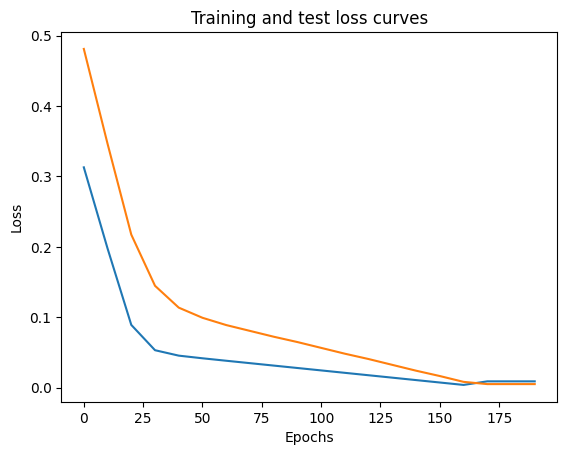

In [74]:
#Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()) , label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")

In [61]:
model_O.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [62]:
model_O.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [63]:
weight , bias

(0.7, 0.3)

In [65]:
with torch.inference_mode():
  y_preds_new = model_O(x_test)

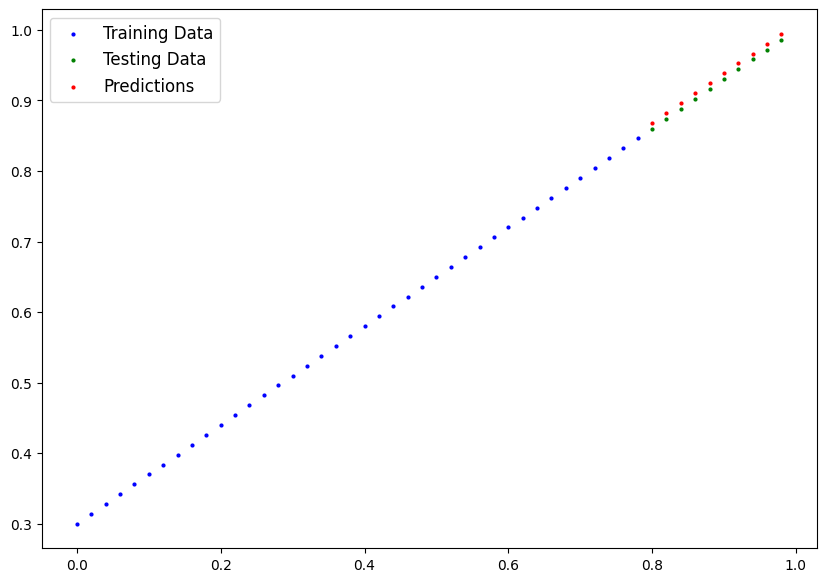

In [66]:
plot_predictions(predictions=y_preds_new)